In [132]:
import pandas as pd
from dotenv import load_dotenv
import os
import requests
import time
import hashlib
import hmac
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


os.environ.pop("API_KEY")
os.environ.pop("SECRET_KEY")

load_dotenv()

API_KEY = os.environ["API_KEY"]
API_SECRET = os.environ["SECRET_KEY"]

In [64]:
def boilerplate(params, endpoint):
    BASE_URL = 'https://api.binance.com'

    # Create the signature using HMAC-SHA256
    query_string = '&'.join([f"{key}={value}" for key, value in params.items()])
    signature = hmac.new(
        API_SECRET.encode('utf-8'),
        query_string.encode('utf-8'),
        hashlib.sha256
    ).hexdigest()

    # Add the signature to the parameters
    params['signature'] = signature

    # Define the headers with API key
    headers = {
        'X-MBX-APIKEY': API_KEY
    }

    # Send the GET request
    response = requests.get(BASE_URL + endpoint, headers=headers, params=params)

    # Check response status and print the result
    if response.status_code == 200:
        # print(response.json())
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return Exception(f"Error: {response.status_code}, {response.text}")
    
def boilerplate1(params, endpoint):
    BASE_URL = 'https://api.binance.com'

    # Create the signature using HMAC-SHA256
    query_string = '&'.join([f"{key}={value}" for key, value in params.items()])
    # signature = hmac.new(
    #     API_SECRET.encode('utf-8'),
    #     query_string.encode('utf-8'),
    #     hashlib.sha256
    # ).hexdigest()

    # # Add the signature to the parameters
    # params['signature'] = signature

    # Define the headers with API key
    headers = {
        'X-MBX-APIKEY': API_KEY
    }

    # Send the GET request
    response = requests.get(BASE_URL + endpoint, headers=headers, params=params)

    # Check response status and print the result
    if response.status_code == 200:
        # print(response.json())
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return Exception(f"Error: {response.status_code}, {response.text}")

# Dual Investment Strategy
- **Put** Indicates that you are trying to buy the crypto product/ coin/ asset with stable coin. It means you are trying to buy Low
- **Call** Indicates that you are trying to Sell the crypto product/ coin/ asset for stable coin. It means you are trying to Sell High


In [3]:
def get_DCI_products(optionType, exercisedCoin, investCoin, pageSize, pageIndex):

    # Define the endpoint and base URL
    endpoint = '/sapi/v1/dci/product/list'

    # Define request parameters
    params = {
        'optionType': optionType,  #'CALL' or 'PUT'
        'exercisedCoin': exercisedCoin,  # Target exercised asset
        'investCoin': investCoin,  # Asset used for subscribing
        'pageSize': pageSize,  # Optional
        'pageIndex': pageIndex,  # Optional
        'recvWindow': 60000,  # Optional
        'timestamp': int(time.time() * 1000)  # Current timestamp in milliseconds
    }

    return boilerplate(params, endpoint)


In [4]:
def get_DCI_account():

    # Define the endpoint and base URL
    endpoint = '/sapi/v1/dci/product/accounts'

    # Define request parameters
    params = {
        'recvWindow': 60000,  # Optional
        'timestamp': int(time.time() * 1000)  # Current timestamp in milliseconds
    }

    return boilerplate(params, endpoint)



In [5]:
def get_DCI_positions():

    # Define the endpoint and base URL
    endpoint = '/sapi/v1/dci/product/positions'

    # Define request parameters
    params = {
        'recvWindow': 60000,  # Optional
        'timestamp': int(time.time() * 1000)  # Current timestamp in milliseconds
    }
    return boilerplate(params, endpoint)


In [65]:
def get_price_historical(symbol, interval):
    
    # Define the endpoint and base URL
    endpoint = '/api/v3/klines'

    # Define request parameters
    params = {
        'symbol': symbol,   
        'interval': interval  
    }
    return boilerplate1(params, endpoint)

In [102]:
data = get_price_historical("ETHUSDT", "1d")
columns = [
    "Kline Open Time", "Open Price", "High Price", "Low Price", 
    "Close Price", "Volume", "Kline Close Time", "Quote Asset Volume", 
    "Number of Trades", "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume"
]

cleaned_data = [row[:-1] for row in data]  # Remove the last element from each row

df = pd.DataFrame(cleaned_data, columns=columns)

# print(df)
df

df['Kline Open Time'] = pd.to_datetime(df['Kline Open Time'],unit='ms')
df['Kline Close Time'] = pd.to_datetime(df['Kline Close Time'],unit='ms')

df["Open Price"] = pd.to_numeric(df["Open Price"])
df["High Price"] = pd.to_numeric(df["High Price"])
df["Low Price"] = pd.to_numeric(df["Low Price"])
df["Close Price"] = pd.to_numeric(df["Close Price"])
df["Volume"] = pd.to_numeric(df["Volume"])
df["Quote Asset Volume"] = pd.to_numeric(df["Quote Asset Volume"])
df["Taker Buy Base Asset Volume"] = pd.to_numeric(df["Taker Buy Base Asset Volume"])
df["Taker Buy Quote Asset Volume"] = pd.to_numeric(df["Taker Buy Quote Asset Volume"])



df_copy = df

In [123]:
df_price_movements_column = []
for n in range(1, 31):
    df_price_movements_column.append(f'Price Movement {n} days')
    df_copy[f'Price Movement {n} days'] = (df_copy['Close Price'].shift(n) - df_copy['Close Price']) / df_copy['Close Price']


df_price_movements = df_copy.dropna()
df_price_movements=df_price_movements[df_price_movements_column]
df_price_movements


,Price Movement 1 days,Price Movement 2 days,Price Movement 3 days,Price Movement 4 days,Price Movement 5 days,Price Movement 6 days,Price Movement 7 days,Price Movement 8 days,Price Movement 9 days,Price Movement 10 days,...,Price Movement 21 days,Price Movement 22 days,Price Movement 23 days,Price Movement 24 days,Price Movement 25 days,Price Movement 26 days,Price Movement 27 days,Price Movement 28 days,Price Movement 29 days,Price Movement 30 days
30,-0.012555,-0.003249,-0.014109,-0.005103,-0.056251,-0.085154,-0.093664,-0.090078,-0.095260,-0.122098,...,-0.004629,-0.003550,0.004150,-0.019497,-0.013256,0.000943,-0.003265,0.005182,-0.036291,-0.037397
31,0.021426,0.008602,0.018107,0.007015,0.016213,-0.036031,-0.065552,-0.074245,-0.070582,-0.075875,...,-0.026074,0.016697,0.017800,0.025665,0.001512,0.007886,0.022389,0.018091,0.026719,-0.015643
32,-0.016199,0.004879,-0.007737,0.001614,-0.009298,-0.000249,-0.051646,-0.080690,-0.089242,-0.085638,...,-0.002614,-0.041851,0.000228,0.001312,0.009050,-0.014712,-0.008441,0.005827,0.001598,0.010087
33,0.033676,0.016931,0.038719,0.025678,0.035344,0.024064,0.033419,-0.019710,-0.049731,-0.058572,...,0.002248,0.030973,-0.009584,0.033911,0.035032,0.043030,0.018468,0.024950,0.039699,0.035328
34,-0.012943,0.020297,0.003769,0.025276,0.012403,0.021944,0.010810,0.020043,-0.032398,-0.062031,...,-0.003429,-0.010724,0.017630,-0.022403,0.020529,0.021636,0.029530,0.005286,0.011685,0.026242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.035400,0.100728,0.124157,0.131598,0.139728,0.113430,0.091303,0.122288,0.119652,0.091747,...,-0.009962,0.010330,-0.001946,-0.028256,-0.038289,-0.058741,0.001992,0.036636,0.025883,0.073563
496,0.006086,0.041701,0.107426,0.130998,0.138484,0.146664,0.120206,0.097945,0.129117,0.126466,...,0.005090,-0.003937,0.016478,0.004128,-0.022342,-0.032437,-0.053013,0.008090,0.042944,0.032126
497,-0.026760,-0.020837,0.013825,0.077791,0.100733,0.108018,0.115979,0.090229,0.068563,0.098902,...,0.010263,-0.021807,-0.030591,-0.010723,-0.022743,-0.048505,-0.058329,-0.078355,-0.018887,0.015035
498,-0.000104,-0.026861,-0.020939,0.013720,0.077680,0.100619,0.107903,0.115863,0.090116,0.068453,...,0.001296,0.010159,-0.021908,-0.030692,-0.010826,-0.022844,-0.048603,-0.058426,-0.078450,-0.018988


In [129]:
summary_stats = df_price_movements.describe()
skewness = df_price_movements.skew()
kurtosis = df_price_movements.kurtosis()

Summary Stats:
        Price Movement 1 days  Price Movement 2 days  Price Movement 3 days  \
count             470.000000             470.000000             470.000000   
mean               -0.000123              -0.000252              -0.000386   
std                 0.029041               0.040495               0.049722   
min                -0.161285              -0.189574              -0.178327   
25%                -0.013160              -0.023228              -0.028951   
50%                -0.000539               0.000075              -0.001241   
75%                 0.012768               0.016787               0.022444   
max                 0.114549               0.200055               0.235585   

       Price Movement 4 days  Price Movement 5 days  Price Movement 6 days  \
count             470.000000             470.000000             470.000000   
mean               -0.000396              -0.000554              -0.000829   
std                 0.058434               0.06

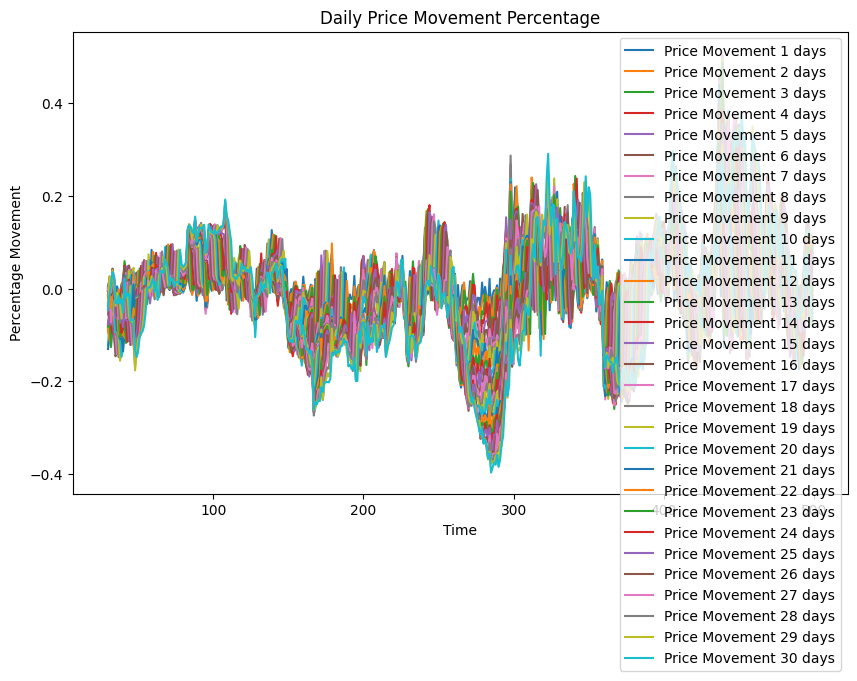

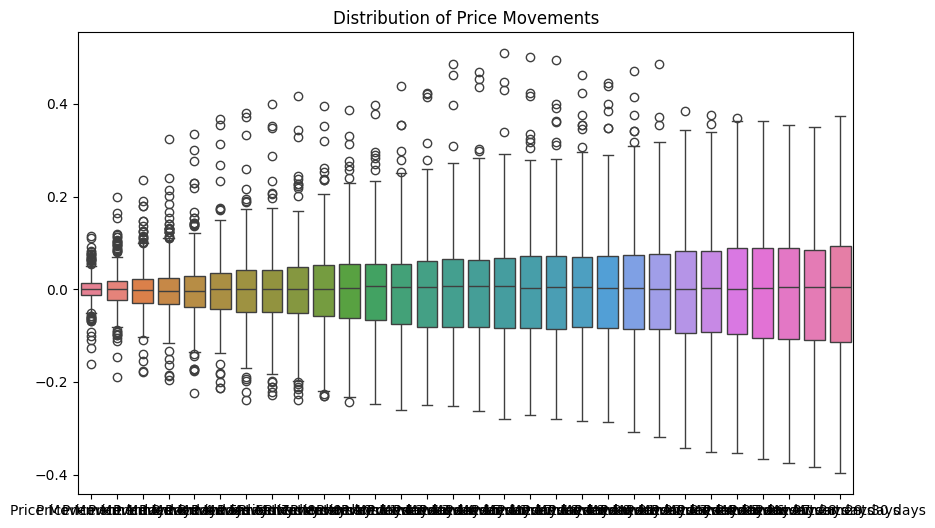

In [131]:
print("Summary Stats:\n", summary_stats)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

# Line plot for price movement visualization
plt.figure(figsize=(10, 6))
for col in df_price_movements.columns:
    plt.plot(df_price_movements.index, df_price_movements[col], label=col)

plt.title('Daily Price Movement Percentage')
plt.xlabel('Time')
plt.ylabel('Percentage Movement')
plt.legend(loc='upper right')
plt.show()

# Box plot to visualize the distribution of each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_price_movements)
plt.title('Distribution of Price Movements')
plt.show()

In [134]:
# 1. Visualizing Price Movements Using Line Plot
fig_line = go.Figure()

# Create a line for each column
for col in df_price_movements.columns:
    fig_line.add_trace(go.Scatter(x=df_price_movements.index, y=df_price_movements[col], mode='lines', name=col))

# Update layout
fig_line.update_layout(
    title="Daily Price Movement Percentage",
    xaxis_title="Time",
    yaxis_title="Percentage Movement",
    template='plotly'
)

# Show the line plot
fig_line.show()

# 2. Visualizing the Distribution with Box Plot
fig_box = px.box(df_price_movements, title="Distribution of Price Movements")

# Show the box plot
fig_box.show()

In [81]:
df.dtypes

Kline Open Time                 datetime64[ns]
Open Price                              object
High Price                              object
Low Price                               object
Close Price                             object
Volume                                  object
Kline Close Time                datetime64[ns]
Quote Asset Volume                      object
Number of Trades                         int64
Taker Buy Base Asset Volume             object
Taker Buy Quote Asset Volume            object
dtype: object

In [112]:
TargetItem = "ETH"
AssetItem = "USDC"
Direction = "PUT"

first = get_DCI_products(Direction, TargetItem, AssetItem, pageIndex=1, pageSize=1)
full_list = first["list"]
total = first["total"]
print(total)

for i in range(total//100+1):
    try:
        curr = get_DCI_products(Direction, TargetItem, AssetItem, pageIndex=i+1, pageSize=100)
        full_list.extend(curr["list"])
    except Exception as e:
        print(f"ERROR found: {e}")

print("---------------------------")
print(len(full_list))

387
---------------------------
362


In [113]:
df = pd.DataFrame(full_list)
df

,id,investCoin,exercisedCoin,strikePrice,duration,settleDate,purchaseDecimal,purchaseEndTime,canPurchase,apr,orderId,minAmount,maxAmount,createTimestamp,optionType,isAutoCompoundEnable,autoCompoundPlanList
0,1344217,USDC,ETH,2425,2,1728374400000,8,1728288000000,True,1.6575,19205914350,0.1,5000716,1726737552000,PUT,True,"[STANDARD, ADVANCE]"
1,1344217,USDC,ETH,2425,2,1728374400000,8,1728288000000,True,1.6575,19205914350,0.1,5000716,1726737552000,PUT,True,"[STANDARD, ADVANCE]"
2,1306738,USDC,ETH,2425,5,1728633600000,8,1728547200000,True,1.2227,19205879076,0.1,1940000,1725156144000,PUT,True,"[STANDARD, ADVANCE]"
3,1344216,USDC,ETH,2400,2,1728374400000,8,1728288000000,True,1.1638,19205915845,0.1,5000716,1726737552000,PUT,True,"[STANDARD, ADVANCE]"
4,1306476,USDC,ETH,2400,5,1728633600000,8,1728547200000,True,0.8896,19205144272,0.1,4800000,1725156144000,PUT,True,"[STANDARD, ADVANCE]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1341242,USDC,ETH,1675,117,1738310400000,8,1738224000000,True,0.037,19203238850,0.1,1340000,1726725627000,PUT,True,"[STANDARD, ADVANCE]"
358,1248715,USDC,ETH,1850,19,1729843200000,8,1729756800000,True,0.0368,19200560706,0.1,1480000,1722793328000,PUT,True,"[STANDARD, ADVANCE]"
359,1310599,USDC,ETH,1675,54,1732867200000,8,1732780800000,True,0.0368,19198821575,0.1,1340000,1725230189000,PUT,True,"[STANDARD, ADVANCE]"
360,1375462,USDC,ETH,1525,173,1743148800000,8,1743062400000,True,0.0368,19192166135,0.1,1220000,1727568037000,PUT,True,"[STANDARD, ADVANCE]"


In [114]:
df = df.sort_values(by=['apr', 'duration'], ascending=[False, True])
df["strikePrice"] = df.strikePrice.astype(float)
df["apr"] = df.apr.astype(float)
df["1000return"] = df["apr"]*df["duration"]*1000/365

df

,id,investCoin,exercisedCoin,strikePrice,duration,settleDate,purchaseDecimal,purchaseEndTime,canPurchase,apr,orderId,minAmount,maxAmount,createTimestamp,optionType,isAutoCompoundEnable,autoCompoundPlanList,1000return
0,1344217,USDC,ETH,2425.0,2,1728374400000,8,1728288000000,True,1.6575,19205914350,0.1,5000716,1726737552000,PUT,True,"[STANDARD, ADVANCE]",9.082192
1,1344217,USDC,ETH,2425.0,2,1728374400000,8,1728288000000,True,1.6575,19205914350,0.1,5000716,1726737552000,PUT,True,"[STANDARD, ADVANCE]",9.082192
2,1306738,USDC,ETH,2425.0,5,1728633600000,8,1728547200000,True,1.2227,19205879076,0.1,1940000,1725156144000,PUT,True,"[STANDARD, ADVANCE]",16.749315
3,1344216,USDC,ETH,2400.0,2,1728374400000,8,1728288000000,True,1.1638,19205915845,0.1,5000716,1726737552000,PUT,True,"[STANDARD, ADVANCE]",6.376986
4,1306476,USDC,ETH,2400.0,5,1728633600000,8,1728547200000,True,0.8896,19205144272,0.1,4800000,1725156144000,PUT,True,"[STANDARD, ADVANCE]",12.186301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1341242,USDC,ETH,1675.0,117,1738310400000,8,1738224000000,True,0.0370,19203238850,0.1,1340000,1726725627000,PUT,True,"[STANDARD, ADVANCE]",11.860274
358,1248715,USDC,ETH,1850.0,19,1729843200000,8,1729756800000,True,0.0368,19200560706,0.1,1480000,1722793328000,PUT,True,"[STANDARD, ADVANCE]",1.915616
359,1310599,USDC,ETH,1675.0,54,1732867200000,8,1732780800000,True,0.0368,19198821575,0.1,1340000,1725230189000,PUT,True,"[STANDARD, ADVANCE]",5.444384
360,1375462,USDC,ETH,1525.0,173,1743148800000,8,1743062400000,True,0.0368,19192166135,0.1,1220000,1727568037000,PUT,True,"[STANDARD, ADVANCE]",17.442192


In [115]:
df.dtypes

id                       object
investCoin               object
exercisedCoin            object
strikePrice             float64
duration                  int64
settleDate                int64
purchaseDecimal           int64
purchaseEndTime           int64
canPurchase                bool
apr                     float64
orderId                   int64
minAmount                object
maxAmount                object
createTimestamp           int64
optionType               object
isAutoCompoundEnable       bool
autoCompoundPlanList     object
1000return              float64
dtype: object

In [116]:
fig = px.scatter(df, x="strikePrice", y="apr", hover_data=["id","orderId", "duration", "1000return"], title=f"{TargetItem} Buy low target")
fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 0.1
    )
)
fig.show()


In [117]:
fig = px.scatter(df, x="duration", y="apr", hover_data=["strikePrice", "id", "1000return"])
fig.show()

In [118]:
fig = px.scatter(df, x="duration", y="1000return", hover_data=["id", "apr", "strikePrice"])
fig.show()

In [121]:
fig = px.scatter(df, x="strikePrice", y="1000return", hover_data=["id", "apr", "strikePrice", "duration"])
fig.show()

In [ ]:
get_DCI_account()

In [ ]:
get_DCI_positions()